## HTML Website Tutorial -- A Companion Notebook to the LaTeX Guide!

### 1. Creating an Astropy Table <br>
Before streamlining the writing of HTML files for every galaxy in your sample, it will be helpful to have the relevant information organized into a FITS table. This table could include the galaxy's name or ID, its RA and DEC coordinates on the sky, and even its morphological type. If you do not already have access to such a table, you can either generate one using python/astropy or create this table manually using a spreadsheet and downloading the result as a CSV file. 

In [162]:
#load/display a table

from astropy.table import Table
import os
homedir=os.getenv("HOME")

tab = Table.read(homedir+'/v2_snrcoadd.fits')
tab

VFID,RA_1,DEC_1,vr,radius,radius_flag,objname,PGC,NSAIDV1,NSAIDV0,AGC,NEDname,HLflag,NSAV1flag,NSAV0flag,A100flag,VFID_V1,COflag,HAflag,HAobsflag,Z0MGSflag,Steerflag,unwiseflag,prefix,snr15,snr30,snr15_flag,snr30_flag,coadd_id,GroupID,GroupSize,sgacut_flag,group_flag,primaryGroup_flag,ncomp,group_name,massflag,SNRflag,t_flag,sSFR_flag,SFRflag,subsample_flag
,,,,arcsec,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bytes8,float64,float64,float64,float32,bool,bytes28,int32,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes8,bool,bool,bool,bool,bool,bool,bytes36,float64,float64,bool,bool,bytes8,int32,int32,bool,bool,bool,int64,bytes28,bool,bool,bool,bool,bool,bool
VFID0000,185.86877249999998,74.9522485,1418.8,23.829847,True,NGC4363,40233,0,0,0,NGC 4363,True,False,False,False,VFID0000,False,False,False,True,True,False,VFID0000-NGC4363,6.5,3.8,False,False,1853p742,1,4,False,True,True,--,N/A,True,False,True,True,True,False
VFID0001,182.208,74.9042778,1331.5,49.6731,True,NGC4133,38578,0,0,0,NGC 4133,True,False,False,False,VFID0001,False,False,False,True,True,False,VFID0001-NGC4133,70.1,52.0,True,True,1800p742,--,--,True,False,False,1,NGC4133,True,True,True,True,True,True
VFID0002,145.944663,74.8595778,3049.4,62.3909,True,NGC2977,27845,0,0,0,NGC 2977,True,False,False,False,VFID0002,False,False,False,True,True,False,VFID0002-NGC2977,72.7,45.9,True,True,1451p757,--,--,True,False,False,1,NGC2977,True,True,True,True,True,True
VFID0003,185.5730835,74.8383889,1833.0,26.128908,True,PGC040048,40048,0,0,0,CGCG 352-030,True,False,False,False,VFID0003,False,False,False,True,True,False,VFID0003-CGCG352-030,2.5,1.5,False,False,1853p742,1,4,False,True,True,--,N/A,True,False,False,False,False,False
VFID0004,182.82775049999998,74.8082222,1683.0,40.937492,True,UGC07189,38805,0,0,0,UGC 07189,True,False,False,False,VFID0004,False,False,False,True,True,False,VFID0004-UGC07189,6.9,4.4,False,False,1853p742,1,4,False,True,True,--,N/A,True,False,True,False,False,False
VFID0005,173.1341835,74.6275401,1920.1,48.654305,True,NGC3752,35608,0,0,0,NGC 3752,True,False,False,False,VFID0005,False,False,False,True,True,True,VFID0005-NGC3752,34.0,21.0,True,True,1747p742,--,--,True,False,False,1,NGC3752,True,True,True,True,True,True
VFID0006,121.912404,74.5846308,2333.0,26.984928,True,UGC04202,22815,0,0,0,UGC 04202,True,False,False,False,VFID0006,False,False,False,True,True,False,VFID0006-UGC04202,1.6,1.3,False,False,1217p742,--,--,False,True,True,--,N/A,True,False,True,False,False,False
VFID0007,118.2363,74.576533,2346.0,23.448833,True,PGC022064,22064,0,0,0,KUG 0746+747,True,False,False,False,VFID0007,False,False,False,True,True,False,VFID0007-KUG0746+747,1.7,1.3,False,False,1164p742,2,2,False,True,True,--,N/A,True,False,True,True,True,False


The RA and DEC coordinates will be especially helpful for the next step, so be sure to have these handy.

### 2. Matplotlib: Converting FITS to PNG <br>

This section involves preparing the "visual" component of the webpage, namely the images. I will be assuming that FITS images of the sample galaxies are already made available to you.

Firstly, you will want to convert these FITS files to PNG images, which Matplotlib makes relatively uncomplicated.

In [76]:
from matplotlib import pyplot as plt
%matplotlib inline

from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm

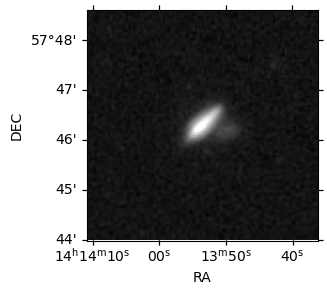

In [94]:
w3_im_path = homedir+'/vf_html_w1/all_input_fits/NGC5526-custom-image-W3.fits'

w3_im, w3_header = fits.getdata(w3_im_path, header=True)

#plotting and saving a FITS image as PNG
#plt.figure(figsize=(3,3))
#plt.imshow(w3_im,origin='lower',cmap='gray')

#use the following line to hide the axis tick marks/labels
#plt.axis('off')

#if you want the tick marks to instead refer to RA+DEC coordinates instead of pixel coordinates:
wcs_w3 = WCS(w3_header)
plt.figure(figsize=(4,3)) #note that you might have to adjust the figsize here! try (5,4)
plt.subplot(projection=wcs_w3)

#a helpful visualization trick for many galaxies
norm = simple_norm(w3_im, stretch='asinh',max_percent=99.9)

plt.imshow(w3_im,origin='lower',cmap='gray',norm=norm)
plt.xlabel('RA')
plt.ylabel('DEC')

#plt.savefig(homedir+'/Desktop/example.png')
plt.show()

A second trick is to download the optical image of the galaxy, courtesy of the Legacy Survey (https://www.legacysurvey.org/) and the trusty wget module. We can extract the necessary parameters to ensure that this image has the same scale and pixel size as our image with the FITS header information! Note that this cutout will be a square shape, so if your FITS image has a wonky geometry try not to be alarmed by the symmetric parallelogram.

In [101]:
import wget
import numpy as np

pscale = np.abs(float(w3_header['CD1_1'])) #grabs transformation matrix of image
xsize = np.abs(int(w3_header['NAXIS1'])) #grabs length of the image
xsize_arcsec=pscale*3600*xsize #converts length to arcseconds
imsize = str(int(xsize_arcsec/pixscale)) #converts length to integer...then to a string

LS_filename = homedir+'/Desktop/LS_example.jpg' #choose a filename for the LS optical image

#use either your astropy table of the galaxy FITS header to extract its RA and DEC
#RA = tab['RA']['your_index_here']
#DEC = tab['RA']['your_index_here']
RA = w3_header['CENTRA']
DEC = w3_header['CENTDEC']

#the following is the url leading to the downloading of the LS image.
image_url = f'https://www.legacysurvey.org/viewer/cutout.jpg?ra={RA}&dec={DEC}&layer=ls-dr9&size={imsize}&pixscale={1}'

w3_LS_image = wget.download(image_url,out=LS_filename)

And we can then display this JPG image using matplotlib.mpimg...

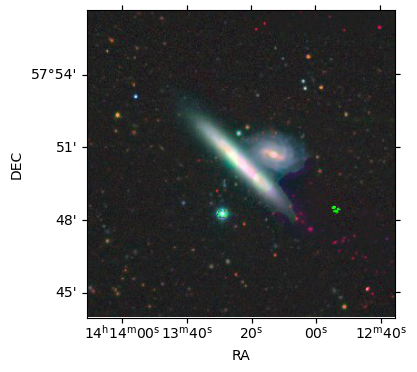

In [100]:
plt.figure(figsize=(4,4))
plt.subplot(projection=wcs_w3)
plt.imshow(mpimg.imread(LS_filename))
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

Yet another display option is to create an image mosaic! Let's try this now with the LS and W3 images.

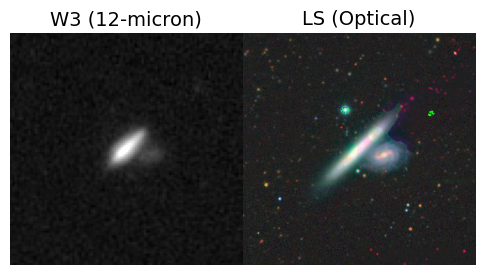

In [92]:
import matplotlib.image as mpimg

images = [w3_im, LS_filename]
titles = ['W3 (12-micron)', 'LS (Optical)']

plt.figure(figsize=(6,4))
for i,im in enumerate(images): #this will define both the iterative counter i and the im names
    
    if i==0: #run this block for the W3 image only
        plt.subplot(1,len(images),i+1) #,projection=w3_header)
        norm = simple_norm(images[i],stretch='asinh',max_percent=99.9)
        plt.imshow(images[i],origin='lower',cmap='gray',norm=norm)
        plt.xlabel('RA_1')
        plt.ylabel('DEC_1')
        plt.axis('off')

    if i==1:
        plt.subplot(1,len(images),i+1)
        plt.imshow(mpimg.imread(images[i]))
        plt.axis('off')
    
    plt.subplots_adjust(wspace=0,hspace=0)
    plt.title(titles[i],fontsize=14)

plt.savefig(homedir+'/Desktop/LS_mosaic_example.png',bbox_inches = 'tight',pad_inches=0.2)
plt.show()

With each of these techniques in mind, you are now equipped to automate the process! The setup we will want to create is of a main directory in which are various folders for the FITS images, the output LS images and/or mosaics, and HTML files.

The cell(s) below share an example of looping through a subset of galaxies to pull the LS JPG images. 

In [185]:
#function which creates directories if they do not already exist. not required.
def create_folder(folder_path):
    if os.path.exists(folder_path)==False:
        os.system('mkdir '+folder_path)
        return

main_path = homedir+'/Desktop/test_master/'
master_dir = main_path
input_dir = main_path+'input_fits'
LS_dir = main_path+'LS_images' 
    
create_folder(master_dir)
create_folder(input_dir)
create_folder(LS_dir)

#defining a test sample
test_sample = tab[tab['subsample_flag']][0:3]
test_RA = test_sample['RA_1']
test_DEC = test_sample['DEC_1']
test_ID = test_sample['VFID']
test_name = test_sample['objname']

# **OPTIONAL** moving FITS images into input_directory
for i in range(len(test_sample)):
    imname = f'{test_name[i]}-custom-image-W3.fits'
    os.system(f'cp {homedir}/vf_html_w1/all_input_fits/{imname} {input_dir}')
    
#creating the loop!

for i in range(len(test_sample)):
    
    imname = f'{test_name[i]}-custom-image-W3.fits'
    im,header = fits.getdata(f'{input_dir}/{imname}', header=True)
    RA = test_RA[i]
    DEC = test_DEC[i]
    
    pscale = np.abs(float(header['CD1_1']))
    xsize=np.abs(int(header['NAXIS1']))
    xsize_arcsec=pscale*3600*xsize
    imsize = int(xsize_arcsec/pixscale)
    
    LS_filename = LS_dir+f'/{test_name[i]}-LS.jpg'
    
    image_url = f'https://www.legacysurvey.org/viewer/cutout.jpg?ra={RA}&dec={DEC}&layer=ls-dr9&size={imsize}&pixscale={1}'
    
    w3_LS_image = wget.download(image_url,out=LS_filename)

### 3. Homepage HTML

In previous cells, we defined our (sub)sample table, RA and DEC, the arrays of galaxy names and IDs, the paths to various directories, and our galaxy optical images. With these, we now possess a decent number of components in order to create a decent homepage. 

In [182]:
#let's initiate a few variables...
tab_title = 'Test Tab Title'
website_title = 'Test Website'
background_color = 'powderblue' #be gentle with background color; no lime green
html_filename = 'master.html'

#**OPTIONAL** create directory for html files
html_dir = main_path+'html_files'
create_folder(html_dir)

#initiating the html file to write text!
with open(f'{html_dir}/{html_filename}','w') as html:

    #NOTE --> the \n at the end of lines will move to a new line in the html textfile
    #(i.e., it is strictly for tidiness purposes)
    html.write('<html><body>\n') #create the body 
    html.write(f'<title>{tab_title}</title>\n') #add text that will appear on the browser tab
    html.write(f'<body style="background-color:{background_color};">\n') #select background color
    html.write('<style type="text/css">\n') #select style type for the text
    html.write('table, td, th {padding: 5px; text-align: center; border: 2px solid black;}\n') #table params
    html.write('p {display: inline-block;;}\n')
    html.write('</style>\n') #and thus concludes the defining of homepage style
    
    html.write(f'<font size="40">{website_title}</font>\n') #add title
    
    #begin to populate the table. this first line is header information. 
    #include as many columns as desired!
    html.write('<table><tr><th>VFID</th><th>LS Cutout</th><th>Prefix</th><th>RA</th><th>DEC</th><th>Comments</th>\n')
    
    #this loop is precisely the part we would like to automate. it will insert the galaxy information
    #in each row for us!
    for i in range(len(test_sample)):
        
        LS_filename = LS_dir+f'/{test_name[i]}-LS.jpg'
        
        html.write(f'<tr><td>{test_ID[i]}</td>\n') #galaxy VFID (a.k.a. the index)
        html.write(f'<td><img src = "{LS_filename}" height="25%" width = "25%"></img></td>\n') #add LS JPG
        html.write(f'<td>{test_name[i]}</td>\n')
        html.write(f'<td>{test_RA[i]}</td>\n')
        html.write(f'<td>{test_DEC[i]}</td>\n')
        html.write(f'<td>-----</td>\n') #replace the dashes with a helpful galaxy comment!
    
    #and close the table, the body, the file. it will write to the destination specified in html_dir
    html.write('</tr></table>\n')
    html.write('<br /><br />\n')
    html.write('</html></body>\n')
    html.close()    

If you would like to open your new HTML file as a browser tab, there are two options that I commonly use:
- Open a new browser tab and press Command+O (Mac) or CTRL+O (Windows) on your keyboard, navigate to your master.html file, and click "Open"
- [Mac Users] In a terminal window, go to the directory where your master.html file is located. Once there, type the command
`open master.html`.

### 4. Creating Hyperlinks

If you would like a landing page for individual galaxies, one idea is to add a hyperlink to every "VFID" or "Prefix" column entry! In place of the html.write() line where I add the test$\_$ID to the table in a loop, I could instead write,

In [183]:
#initiating the html file to write text!
with open(f'{html_dir}/{html_filename}','w') as html:

    #NOTE --> the \n at the end of lines will move to a new line in the html textfile
    #(i.e., it is strictly for tidiness purposes)
    html.write('<html><body>\n') #create the body 
    html.write(f'<title>{tab_title}</title>\n') #add text that will appear on the browser tab
    html.write(f'<body style="background-color:{background_color};">\n') #select background color
    html.write('<style type="text/css">\n') #select style type for the text
    html.write('table, td, th {padding: 5px; text-align: center; border: 2px solid black;}\n') #table params
    html.write('p {display: inline-block;;}\n')
    html.write('</style>\n') #and thus concludes the defining of homepage style
    
    html.write(f'<font size="40">{website_title}</font>\n') #add title
    
    #begin to populate the table. this first line is header information. 
    #include as many columns as desired!
    html.write('<table><tr><th>VFID</th><th>LS Cutout</th><th>Prefix</th><th>RA</th><th>DEC</th><th>Comments</th>\n')
    
    #this loop is precisely the part we would like to automate. it will insert the galaxy information
    #in each row for us!
    for i in range(len(test_sample)):
        
        LS_filename = LS_dir+f'/{test_name[i]}-LS.jpg'
        galhtml = f'{html_dir}/{test_ID[i]}.html'
        
        html.write(f'<tr><td><a href={galhtml}>{test_ID[i]}</a></td>\n')        
        html.write(f'<td><img src = "{LS_filename}" height="25%" width = "25%"></img></td>\n') #add LS JPG
        html.write(f'<td>{test_name[i]}</td>\n')
        html.write(f'<td>{test_RA[i]}</td>\n')
        html.write(f'<td>{test_DEC[i]}</td>\n')
        html.write(f'<td>-----</td>\n') #replace the dashes with a helpful galaxy comment!
    
    #and close the table, the body, the file. it will write to the destination specified in html_dir
    html.write('</tr></table>\n')
    html.write('<br /><br />\n')
    html.write('</html></body>\n')
    html.close()  

This line will add a text hyperlink to galaxy page VFIDxxxx.html, where "xxxx" is replaced with the actual galaxy's ID. The "galhtml" variable stores an html file that we have not yet created, so while our website now contains hyperlinked column entries they do not lead to anywhere meaningful.

The final link (no pun intended) is therefore to create these galaxy html files. Just as before, we need only to set up the necessary loop with the desired elements. You may want to display mosaics or tabulated data, depending on the type of science you are engaged with. I will give an example here, first using a loop of the LS mosaics routine we created earlier to create some neat galaxy page images.

In [193]:
#**OPTIONAL** create directory for mosaic files
mosaic_dir = main_path+'mosaic_files'
create_folder(mosaic_dir)

for n in range(len(test_sample)):
    vfid = test_sample['VFID'][n]
    ra = test_sample['RA_1'][n]
    dec = test_sample['DEC_1'][n]
    objname = test_sample['objname'][n]
    
    LS_filename = LS_dir+f'/{test_name[n]}-LS.jpg'
    w3_im_path = input_dir+f'/{objname}-custom-image-W3.fits'
    w3_im, w3_header = fits.getdata(w3_im_path, header=True)

    images = [w3_im, LS_filename]
    titles = ['W3 (12-micron)', 'LS (Optical)']

    plt.figure(figsize=(6,4))
    
    for i,im in enumerate(images):
        plt.subplot(1,len(images),i+1)
        if i==0: 
            norm = simple_norm(images[i],stretch='asinh',max_percent=99.9)
            plt.imshow(images[i],origin='lower',cmap='gray',norm=norm)  
        if i==1:
            plt.imshow(mpimg.imread(images[i]))      
        plt.axis('off')
        plt.title(titles[i],fontsize=14)
    
    plt.subplots_adjust(wspace=0,hspace=0)    
    plt.savefig(mosaic_dir+f'/{test_name[n]}-mosaic.png',bbox_inches = 'tight',pad_inches=0.2)    
    plt.close()

Now, for the html.

In [198]:
#will need to create a new hyperlink to the mainpage!
homepage_name = html_dir = main_path+'html_files/'+html_filename

for i in range(len(test_sample)):
    
    LS_name = mosaic_dir+f'/{test_name[i]}-mosaic.png'
    vfid = test_sample[i]['VFID']
    objname = test_sample[i]['objname']
    galhtml = f'{main_path}html_files/{vfid}.html'
    
    with open(galhtml,'w') as html:
        
        html.write('<html><body> \n')
        html.write(f'<title>{vfid}-{objname}</title> \n')  #tab title
        html.write('<style type="text/css"> \n')
        html.write('.img-container{text-align: left;} \n')
        html.write('table, td, th {padding: 5px; text-align: center; border: 1px solid black;} \n')
        html.write('p {display: inline-block;;} \n')
        html.write('</style> \n')

        html.write(f'<font size="40">Central Galaxy: {vfid}-{objname} </font><br /> \n') #page title
        html.write(f'<a href={homepage_name}>Return to Homepage</a></br /> \n')

        #add the LS mosaic
        html.write('<div class='+'"'+'img-container'+'"> <!-- Block parent element --> <img src='+'"'+LS_name+'" height="50%" width="50%" /><br /> \n')

        html.write('<table><tr><th>Example</th><th>Table</th></tr> \n')

        html.write(f'<tr><td>{vfid}</td> \n')
        html.write(f'<td>{objname}</td></tr></table> \n')
        
        html.write('<br>')   #add a space between the table and the hyperlinks
        
        if i != len(test_sample)-1:
            html.write('<a href='+str(test_sample['VFID'][i+1])+'.html>Next Galaxy</a></br /> \n') 
        if i != 0:
            html.write('<a href='+str(test_sample['VFID'][i-1])+'.html>Previous Galaxy</a></br /> \n')
        
        
        html.write('<br /><br />\n')    
        html.write('</html></body>\n')     

        html.close()  

There are a few features here worth mentioning. In addition the the LS mosaic, I include an example table where you can organize galaxy details or parameters. There is also hyperlinked text that I have included at both the top and bottom of the page, where users can click to directly return to the homepage or to switch to the next or previous galaxy. Regarding the latter hyperlinks, there are two `if` statements in the code cell that will only add these hyperlinks if the conditions are met: "Next Galaxy" will appear only if there is more than one galaxy page or the current galaxy is not the final one in the sample; and "Previous Galaxy" will appear only if there is more than one galaxy page or the current galaxy is not the first in the sample.